<a href="https://colab.research.google.com/github/JUNYA-727/SIGNATE/blob/main/TECHNOPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from PIL import Image,ImageDraw
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import shutil
import glob
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
with open('/content/train_annotations.tsv',encoding='utf-8',newline='') as f:
    reader = csv.reader(f,delimiter='\t')
    # ヘッダ行だけを読み込んで、スペース区切りで表示
    header = next(reader)
    print(' '.join(header))
    for cols in reader:
        if cols[1]=='1':
          print(cols)

In [16]:
#txtファイルを作成して記述を行う方法
f=open('train_0001.txt','x')
f.writelines(datalist)
f.close()

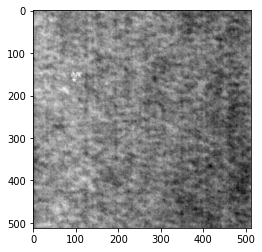

In [34]:
#確認用として
image=Image.open('/content/train_0001.png')
image=np.array(image)
plt.imshow(image,cmap='gray')
plt.show()

In [88]:
#id	label	pattern	semi_major_axis	semi_minor_axis	rotation_angle	x_position y_position
anotation1=['train_0001', '1', 'D', '28.33', '20.01', '-0.64', '102.36', '154.91']
x=float(anotation1[6])
y=float(anotation1[7])
semi=float(anotation1[3])
x1=x-semi
x2=x+semi
y1=y-semi
y2=y+semi
print(x1,y1,x2,y2)

74.03 126.58 130.69 183.24


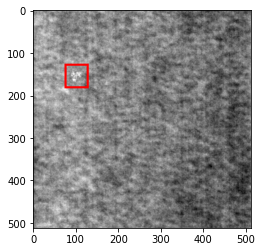

In [99]:
image=Image.open('/content/train_0001.png')
if image.mode != "RGB":
  image = image.convert("RGB")
draw=ImageDraw.Draw(image)
draw.rectangle((x1,y1,x2,y2),outline=(255,0,0),width=5)
plt.imshow(image)
plt.show()

56.56999999999999 64.57 195.43 203.43


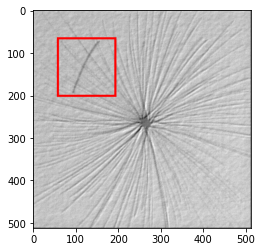

In [100]:
anotation1=['train_0028','1','A','69.43','32.14','-1.09','126.0','134.0']
x=float(anotation1[6])
y=float(anotation1[7])
semi=float(anotation1[3])
x1=x-semi
x2=x+semi
y1=y-semi
y2=y+semi
print(x1,y1,x2,y2)
image=Image.open('/train_0028.png')
if image.mode != "RGB":
  image = image.convert("RGB")
draw=ImageDraw.Draw(image)
draw.rectangle((x1,y1,x2,y2),outline=(255,0,0),width=5)
plt.imshow(image)
plt.show()

**まずはTensorflowでpatern分けを行い､テストデータに対して何のパターンかを予測するモデルを作成する**

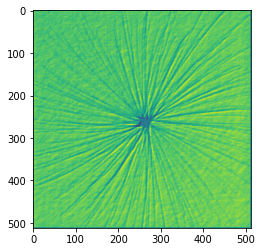

In [114]:
base_dir='/content/drive/MyDrive/signate/train 2'
image_path=os.path.join(base_dir,'train_0591'+'.png')
image=Image.open(image_path)
image=np.array(image)
plt.imshow(image)

In [122]:
with open('/content/drive/MyDrive/signate/train_annotations.tsv',encoding='utf-8',newline='') as f:
    reader = csv.reader(f,delimiter='\t')
    # ヘッダ行だけを読み込んで、スペース区切りで表示
    header = next(reader)
    print(' '.join(header))
    for cols in reader:
      base_dir='/content/drive/MyDrive/signate/train 2'
      if cols[2]=='A':
        image_path=os.path.join(base_dir,cols[0]+'.png')
        new_path=os.path.join('/content/drive/MyDrive/signate/patern/A',cols[0]+'.png')
        shutil.copy(image_path,new_path)
      if cols[2]=='B':
        image_path=os.path.join(base_dir,cols[0]+'.png')
        new_path=os.path.join('/content/drive/MyDrive/signate/patern/B',cols[0]+'.png')
        shutil.copy(image_path,new_path)  
      if cols[2]=='C':
        image_path=os.path.join(base_dir,cols[0]+'.png')
        new_path=os.path.join('/content/drive/MyDrive/signate/patern/C',cols[0]+'.png')
        shutil.copy(image_path,new_path)   
      if cols[2]=='D':
        image_path=os.path.join(base_dir,cols[0]+'.png')
        new_path=os.path.join('/content/drive/MyDrive/signate/patern/D',cols[0]+'.png')
        shutil.copy(image_path,new_path)   

id label pattern semi_major_axis semi_minor_axis rotation_angle x_position y_position


In [8]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(512,512,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(512,512,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(4,activation='softmax')
])
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 510, 510, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 255, 255, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 253, 253, 32)      18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)      

**train_datagen=ImageDataGenerator(rescale=1./255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)**

In [10]:
train_dir='/content/drive/MyDrive/signate/patern'
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='categorical',
                                                   target_size=(512,512))

Found 4600 images belonging to 4 classes.


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=12,
    epochs=100,
    verbose=1)

Text(0.5, 1.0, 'accuracy')

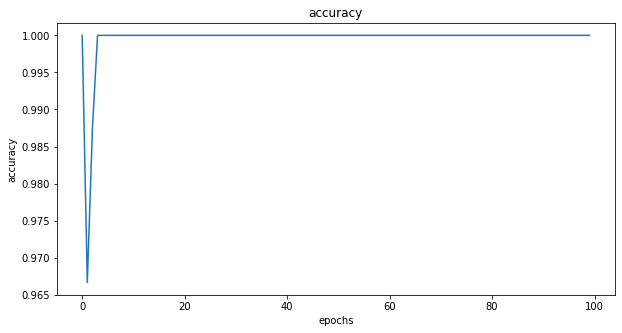

In [13]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')

In [14]:
model.save('/content/drive/MyDrive/signate/Tensorflow_model.h5')